## 1. Setup
***
First lets import the relevant libraries and load our dataset


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns


In [49]:
data = pd.read_csv("../DogNews/nyt_1950_2020.csv")


## 2. Intial Data Exploration
***
What our data looks like:

In [50]:
data.head()

,headline,date,document_type,type_of_material,section_name,keywords,snippet,source,lead_paragraph
0,UPSTATE DOG WINS IN SPRINGER TRIALS,1964-04-05,article,Archives,Archives,[],NaN,The New York Times,"CARVERSVILLE, Pa. April 4—Toodry March Brown, ..."
1,POINTER CAPTURES SHOOTING DOG STAKE,1964-10-26,article,Archives,Archives,[],NaN,The New York Times,"MEDFORD, N. J., Oct. 25—Tip Top Timmy, a point..."
2,DOG LEADS POLICE TO KILLING SUSPECT,1964-12-22,article,Archives,Archives,[],NaN,The New York Times,A dog last night led two detectives to a 16‐ye...
3,DOG FANCIERS SEEM TO FORGIVE JOHNSON,1964-05-02,article,Archives,Archives,['Animals'],Dog fanciers seen ready to forgive Johnson for...,The New York Times,"WASHINGTON, May 1 (UPI) — Dog fanciers were ap..."
4,Afghan Dominates Chicago Dog Show,1964-04-05,article,Archives,Archives,"['Automobiles', 'SHOWS (INTERNATIONAL)']",special sec on show,The New York Times,"CHICAGO, April 4 — An Afghan endowed with rare..."


In [51]:
data.dtypes

headline            object
date                object
document_type       object
type_of_material    object
section_name        object
keywords            object
snippet             object
source              object
lead_paragraph      object
dtype: object

We will change the date type so that it is easier to work with

In [52]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

## 3. Missing Data
***
Let's look at which columns are missing information

In [53]:
data.isna().any()

headline            False
date                False
document_type       False
type_of_material    False
section_name        False
keywords            False
snippet              True
source              False
lead_paragraph       True
dtype: bool

<AxesSubplot:>

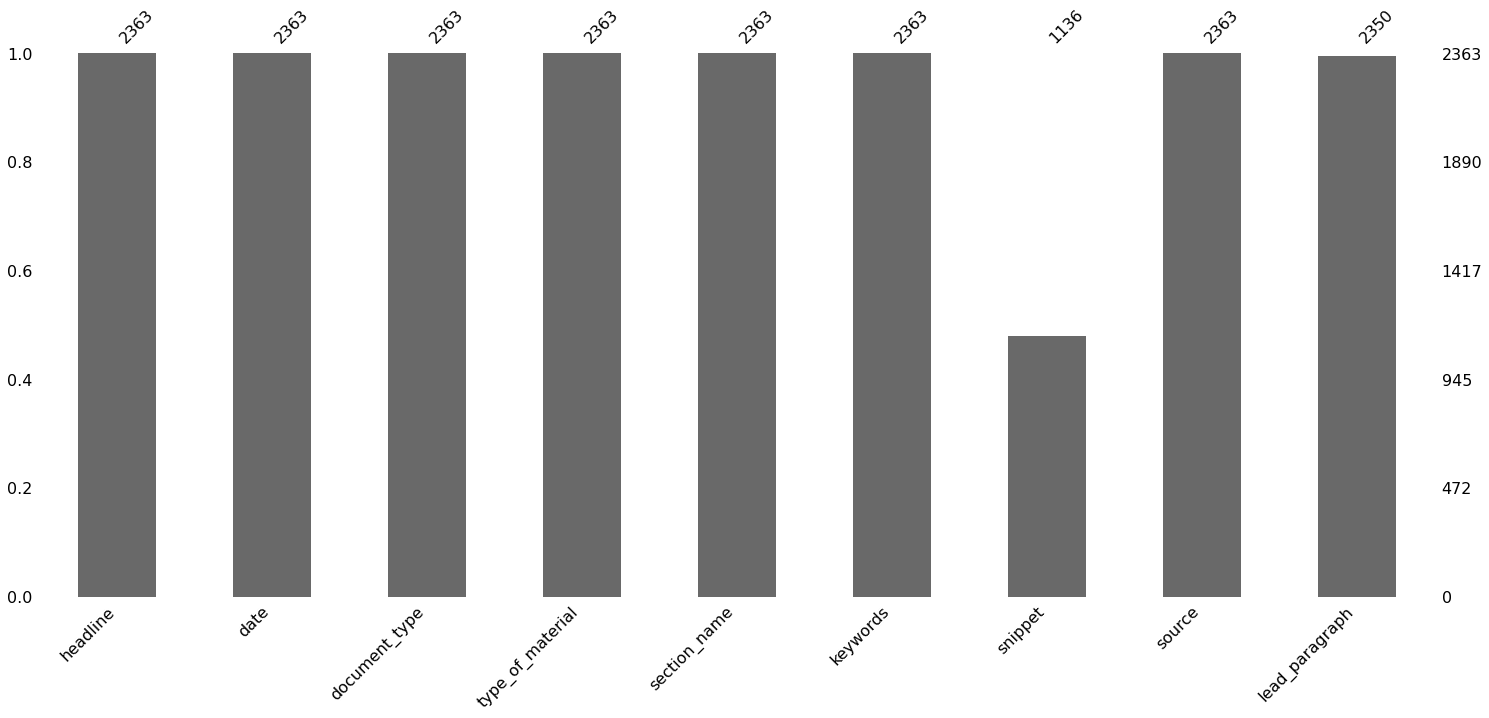

In [54]:
msno.bar(data)

Notice that only 13 articles are missing lead paragraphs, so removing those articles will not have a significant effect on our data set. I also am choosing it remove the snippet column since it contains same text at lead_paragraph

In [55]:
data.dropna(subset=['lead_paragraph'], inplace=True)
data.drop(columns=['snippet'],inplace=True)


Lets explore how many unique values we have for each column:

In [56]:
n = data.nunique(axis=0)
print("No.of.unique values in each column :\n", n)

No.of.unique values in each column :
 headline            2072
date                1899
document_type          1
type_of_material       2
section_name          38
keywords            1025
source                 3
lead_paragraph      2261
dtype: int64


Something interesting to note is that we have duplicate lead_paragraphs possibly from the newspaper printing the same story twice. Let's investigate further.

In [57]:
lead_paragraph = data['lead_paragraph']
data[lead_paragraph.isin(lead_paragraph[lead_paragraph.duplicated()])].sort_values('lead_paragraph')

,headline,date,document_type,type_of_material,section_name,keywords,source,lead_paragraph
2181,A Well-Trained Guide Dog,2014-01-03,article,News,New York,"['Blindness', 'Service Dogs and Other Animals'...",The New York Times,Dear Diary:
2194,Courtesy to the Hot-Dog Man,2014-05-22,article,News,New York,"['Customs, Etiquette and Manners', 'Hot Dogs a...",The New York Times,Dear Diary:
2245,I’m Calling About a Barking Dog,2013-10-09,article,News,New York,"['Dogs', 'Noise']",The New York Times,Dear Diary:
2246,I’m Calling About a Barking Dog,2013-10-09,article,News,New York,"['Dogs', 'Noise']",The New York Times,Dear Diary:
1453,About a Boy (and Hardly About a Dog),1997-05-11,article,News,Arts,['Television'],The New York Times,"''MY Life as a Dog,'' the wryly sad and funny ..."
...,...,...,...,...,...,...,...,...
1499,Too Hungry? Hot Dog Champ Denies It,1999-07-06,article,News,New York,"['Contests and Prizes', 'Meat']",The New York Times,"When Steve Keiner, an Atlantic City electrical..."
564,Shaggy dog story,1977-02-20,article,Archives,Archives,['Dogs'],The New York Times,"Working away on their various books, in a farm..."
570,Shaggy dog story,1977-02-20,article,Archives,Archives,['Dogs'],The New York Times,"Working away on their various books, in a farm..."
2308,"Chinese City Defends Dog Meat Festival, Despit...",2015-06-23,article,News,World,"['Dogs', 'Animal Abuse, Rights and Welfare', '...",The New York Times,"YULIN, China — It was the night before the sum..."


It does look like there are a few articles that are duplicates, lets remove those.

In [58]:
data.drop_duplicates(subset ='lead_paragraph', keep = 'last', inplace = True)
n = data.nunique(axis=0)
print("No.of.unique values in each column :\n", n)

No.of.unique values in each column :
 headline            2045
date                1864
document_type          1
type_of_material       2
section_name          38
keywords            1007
source                 3
lead_paragraph      2261
dtype: int64


Notice that after getting rid of duplicate lead_paragraphs, there are still a number of duplicate headlines. Before we delete these, let's see what these look like

In [59]:
headline = data['headline']
data[headline.isin(headline[headline.duplicated()])].sort_values('headline')

,headline,date,document_type,type_of_material,section_name,keywords,source,lead_paragraph
1864,"A Dog of a Date, Just as Scheduled",2006-10-29,article,News,Style,"['Animals', 'Dogs', 'Pets']",The New York Times,"ON a Thursday morning, 3-year-old Jicky bounde..."
1869,"A Dog of a Date, Just as Scheduled",2006-10-29,article,News,Fashion & Style,"['Animals', 'Pets']",The New York Times,"ON a Thursday morning, 3-year-old Jicky bounde..."
539,A Dog's Best Friend,1971-12-19,article,Archives,Archives,[],The New York Times,"RENO, Dec. 18 (UPI)— A German pointer named Lo..."
1430,A Dog's Best Friend,1998-07-26,article,News,Magazine,"['Animals', 'Dogs', 'First Aid', 'Cardiopulmon...",The New York Times,Linda Lasky has given cardiopulmonary resuscit...
1365,A Dog's Life,1999-01-24,article,News,New York,"['Dogs', 'Philanthropy', 'Bullet-Proof Clothin...",The New York Times,There are about 280 dogs working in law enforc...
...,...,...,...,...,...,...,...,...
346,Topics,1964-08-29,article,Archives,Archives,[],The New York Times,The dog‐days are up‐ on us and nobody knows it...
1813,"Wagging the Dog, and a Finger",2006-05-14,article,News,Style,"['AIRLINES AND AIRPLANES', 'Dogs', 'Restaurant...",The New York Times,"ON a sun-drenched weekend last month, cafes fr..."
1811,"Wagging the Dog, and a Finger",2006-05-14,article,News,Fashion & Style,"['Dogs', 'Restaurants', 'Emotions']",The New York Times,"ON a sun-drenched weekend last month, cafes fr..."
430,"Wood, Field and Stream",1970-01-01,article,Archives,Archives,[],The New York Times,SOME 1970 resolutions for guilty sportsmen:


Here we need to be careful, while some of these items are duplicates, there are a few articles that share a headline but are different articles.
To get rid of the duplicates that share a headline, we will only delete an article if it is published on the same date as one with a duplicate headline.

In [60]:
data.drop_duplicates( subset = ['headline', 'date'],
  keep = 'last', inplace = True)

# print latest dataframe
data.head()

,headline,date,document_type,type_of_material,section_name,keywords,source,lead_paragraph
0,UPSTATE DOG WINS IN SPRINGER TRIALS,1964-04-05,article,Archives,Archives,[],The New York Times,"CARVERSVILLE, Pa. April 4—Toodry March Brown, ..."
1,POINTER CAPTURES SHOOTING DOG STAKE,1964-10-26,article,Archives,Archives,[],The New York Times,"MEDFORD, N. J., Oct. 25—Tip Top Timmy, a point..."
2,DOG LEADS POLICE TO KILLING SUSPECT,1964-12-22,article,Archives,Archives,[],The New York Times,A dog last night led two detectives to a 16‐ye...
3,DOG FANCIERS SEEM TO FORGIVE JOHNSON,1964-05-02,article,Archives,Archives,['Animals'],The New York Times,"WASHINGTON, May 1 (UPI) — Dog fanciers were ap..."
4,Afghan Dominates Chicago Dog Show,1964-04-05,article,Archives,Archives,"['Automobiles', 'SHOWS (INTERNATIONAL)']",The New York Times,"CHICAGO, April 4 — An Afghan endowed with rare..."


## 4. Exploratory Data Analysis
***

Article distributions over time

Text(0, 0.5, 'Count')

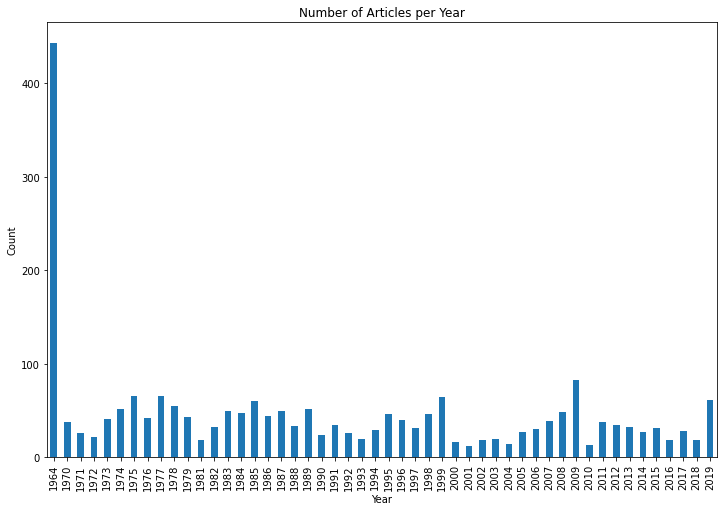

In [61]:
year_amount= data.groupby(data['date'].rename('Years').dt.year).size()
#sns.barplot(x = year_amount.index, y = year_amount.values)
year_amount.plot(kind='bar', figsize=(12, 8))
plt.title('Number of Articles per Year')
plt.xlabel('Year')
plt.ylabel('Count')

Section distribution

Text(0, 0.5, 'Count')

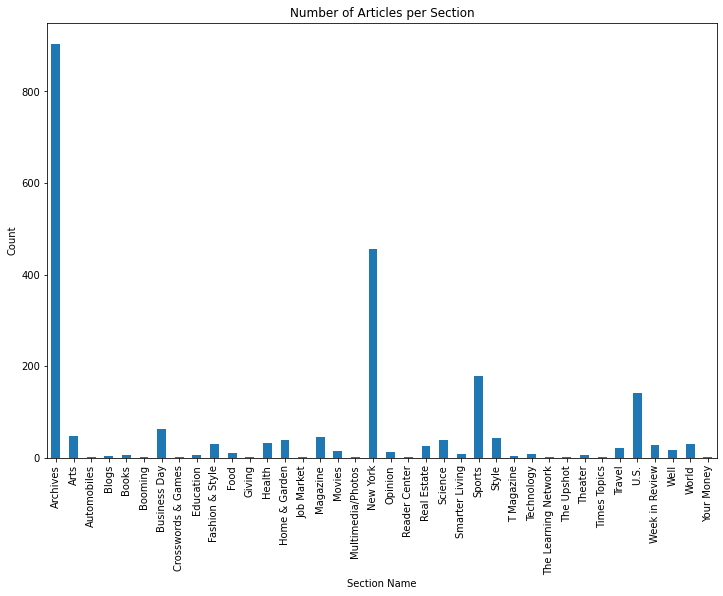

In [62]:
section_amount= data.groupby(data['section_name']).size()
#sns.barplot(x = year_amount.index, y = year_amount.values)
section_amount.plot(kind='bar', figsize=(12, 8))
plt.title('Number of Articles per Section')
plt.xlabel('Section Name')
plt.ylabel('Count')

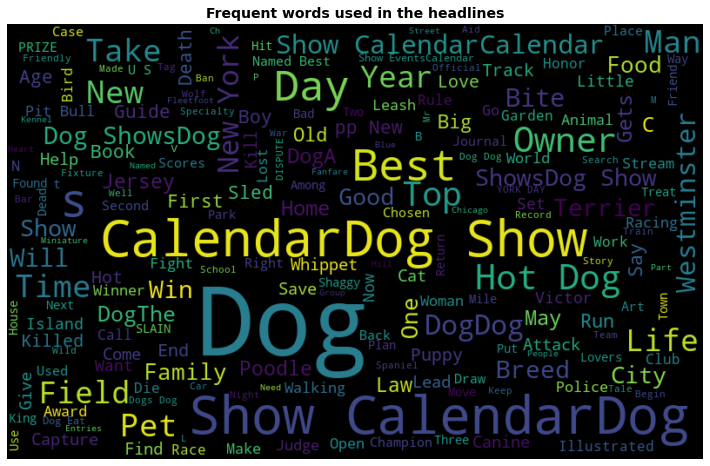

In [64]:
from wordcloud import WordCloud
all_words = ''.join([word for word in data['headline']])
all_words
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Frequent words used in the headlines", weight='bold', fontsize=14)
plt.show()